In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols

%matplotlib inline

In [21]:
df = pd.read_csv('kc_cleaned_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,is_cust_build,years_since_renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0,29.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0,0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,0.0


In [22]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'has_basement',
       'is_cust_build', 'years_since_renovated'],
      dtype='object')

# Finding features that positively correlate to price (leaving in location)

In [23]:
feats = ['price', 'is_cust_build', 'grade', 
        'view', 'waterfront', 'lat', 'long', 'zipcode',
        'sqft_living', 'bedrooms', 'bathrooms', 
        'floors', 'sqft_living15', 'sqft_above', 'date', 
         'has_basement', 'years_since_renovated']

In [24]:
corr = df[feats].corr()

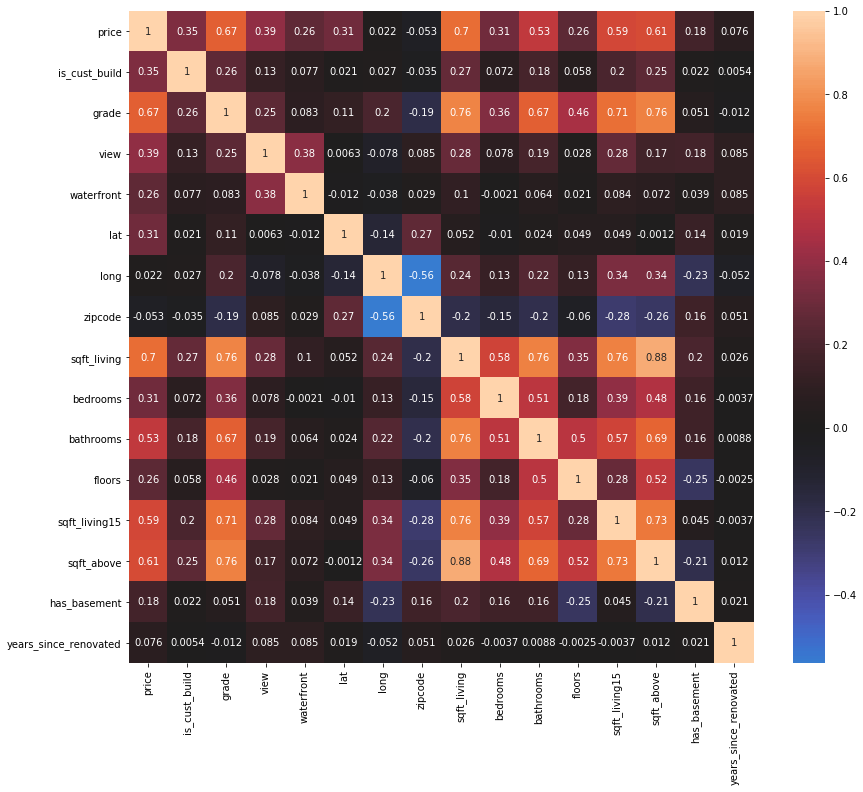

In [25]:
plt.figure(figsize=(14,12))
sns.heatmap(corr, center=0, annot=True);

In [26]:
df_high_corr_and_location=df[feats]
df_high_corr_and_location.head()

,price,is_cust_build,grade,view,waterfront,lat,long,zipcode,sqft_living,bedrooms,bathrooms,floors,sqft_living15,sqft_above,date,has_basement,years_since_renovated
0,221900.0,0,7,0.0,0.0,47.5112,-122.257,98178,1180,3,1.00,1.0,1340,1180,10/13/2014,0,0.0
1,538000.0,0,7,0.0,0.0,47.7210,-122.319,98125,2570,3,2.25,2.0,1690,2170,12/9/2014,1,29.0
2,180000.0,0,6,0.0,0.0,47.7379,-122.233,98028,770,2,1.00,1.0,2720,770,2/25/2015,0,0.0
3,604000.0,0,7,0.0,0.0,47.5208,-122.393,98136,1960,4,3.00,1.0,1360,1050,12/9/2014,1,0.0
4,510000.0,0,8,0.0,0.0,47.6168,-122.045,98074,1680,3,2.00,1.0,1800,1680,2/18/2015,0,0.0


In [27]:
df_high_corr_and_location.to_csv('kc_housing_data_location_and_high_correlation.csv', index=False)

In [28]:
df_high_corr_and_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21597 non-null  float64
 1   is_cust_build          21597 non-null  int64  
 2   grade                  21597 non-null  int64  
 3   view                   21597 non-null  float64
 4   waterfront             21597 non-null  float64
 5   lat                    21597 non-null  float64
 6   long                   21597 non-null  float64
 7   zipcode                21597 non-null  int64  
 8   sqft_living            21597 non-null  int64  
 9   bedrooms               21597 non-null  int64  
 10  bathrooms              21597 non-null  float64
 11  floors                 21597 non-null  float64
 12  sqft_living15          21597 non-null  int64  
 13  sqft_above             21597 non-null  int64  
 14  date                   21597 non-null  object 
 15  ha

# Boxplots

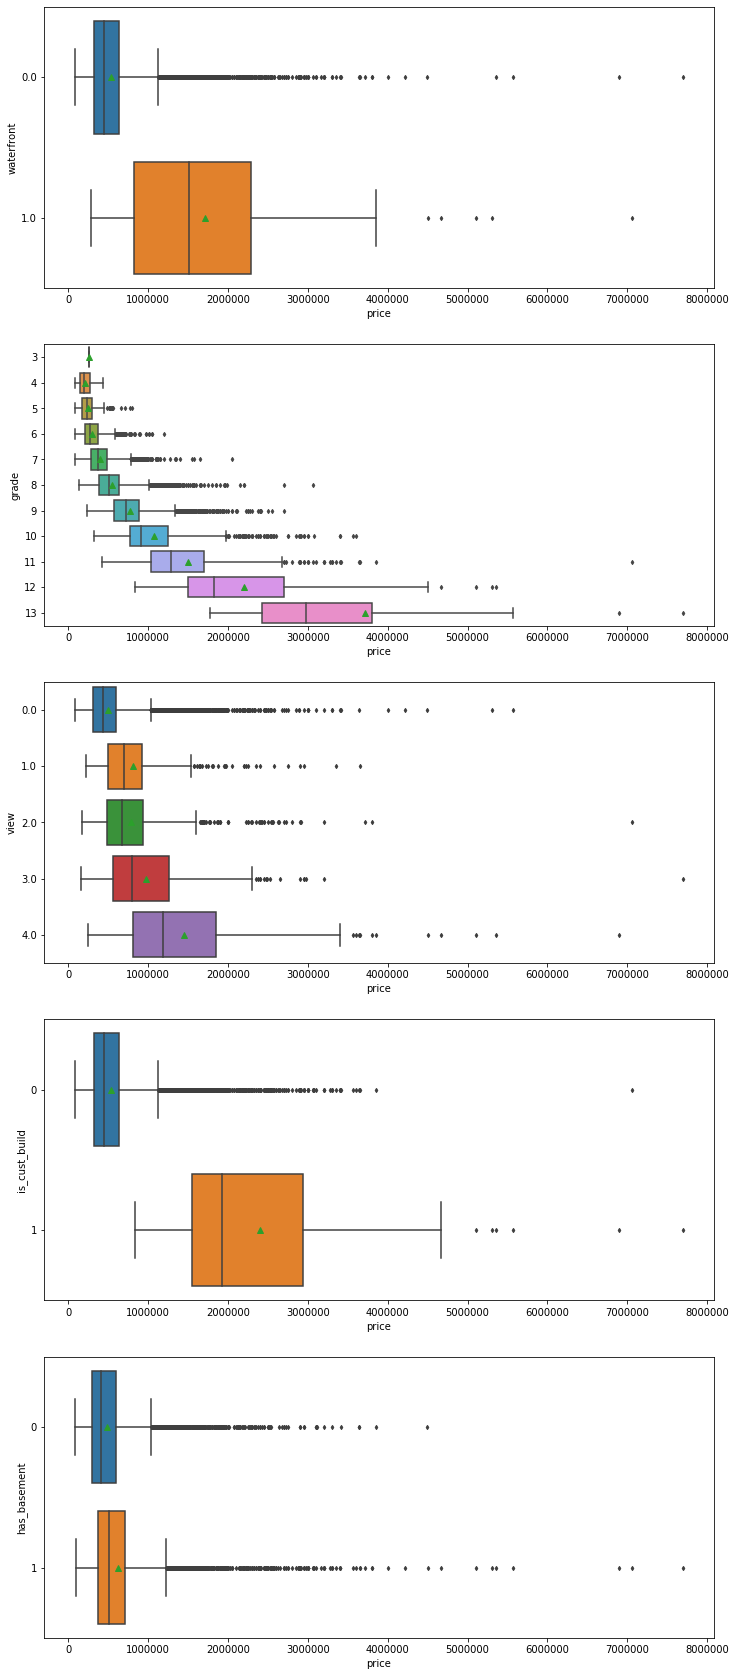

In [32]:
fig, axarr = plt.subplots(5, figsize=(12,30))

sns.boxplot(y = 'waterfront', x = 'price', data = df_high_corr_and_location,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])

sns.boxplot(y = 'grade', x = 'price', data = df_high_corr_and_location,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])

sns.boxplot(y = 'view', x = 'price', data = df_high_corr_and_location,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])

sns.boxplot(y = 'is_cust_build', x = 'price', data = df_high_corr_and_location,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[3])

sns.boxplot(y = 'has_basement', x = 'price', data = df_high_corr_and_location,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[4])

plt.show()

# Trying VIF

In [33]:
feats

['price',
 'is_cust_build',
 'grade',
 'view',
 'waterfront',
 'lat',
 'long',
 'zipcode',
 'sqft_living',
 'bedrooms',
 'bathrooms',
 'floors',
 'sqft_living15',
 'sqft_above',
 'date',
 'has_basement',
 'years_since_renovated']

def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['is_cust_build', 'grade', 'view', 'waterfront', 
             'lat', 'long', 'sqft_living', 'bedrooms', 'bathrooms', 
             'floors', 'sqft_living15', 'sqft_above']:
    df_high_corr_and_location[feat] = norm_feat(df_high_corr_and_location[feat])
df_high_corr_and_location.head()

df_high_corr_and_location.hist(figsize=(20,18))
plt.show()

In [34]:
from statsmodels.formula.api import ols

In [35]:
outcome = 'price'
x_cols = ['is_cust_build', 'view', 'waterfront',
         'sqft_living15', 'has_basement', 'years_since_renovated']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_high_corr_and_location).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     3328.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:44:01   Log-Likelihood:            -3.0032e+05
No. Observations:               21597   AIC:                         6.007e+05
Df Residuals:                   21590   BIC:                         6.007e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -3.751e+04   5851.391     -6.410      0.000    -4.9e+04    -2.6e+04
is_cust_build          1.174e+06   2.69e+04     43.636      0.000    1.12e+06    1.23e+06
view                   7.352e+04   2693.433     27.296      0.000    6.82e+04    7.88e+04
waterfront             6.276e+05   2.39e+04     26.313      0.000    5.81e+05    6.74e+05
sqft_living15           258.5189      2.782     92.921      0.000     253.066     263.972
has_basement           8.938e+04   3764.369     23.745      0.000     8.2e+04    9.68e+04
years_since_renovated  3462.9247    344.660     10.047      0.000    2787.366    4138.483
==============================================================================
Omnibus:                    15408.936   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           740367.485
Skew:                           2.903   Prob(JB):                         0.00
Kurtosis:                      31.090   Cond. No.                     3.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
X = df_high_corr_and_location[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('is_cust_build', 1.030073738555537),
 ('view', 1.3777170999326336),
 ('waterfront', 1.1839800322631744),
 ('sqft_living15', 1.6694694950513829),
 ('has_basement', 1.5873478855265268),
 ('years_since_renovated', 1.032259570493536)]

In [78]:
cols = ['price','is_cust_build', 'view', 'waterfront', 'sqft_living15', 'has_basement', 'years_since_renovated']
df_model = df_high_corr_and_location[cols]
df_model.head()

,price,is_cust_build,view,waterfront,sqft_living15,has_basement,years_since_renovated
0,221900.0,0,0.0,0.0,1340,0,0.0
1,538000.0,0,0.0,0.0,1690,1,29.0
2,180000.0,0,0.0,0.0,2720,0,0.0
3,604000.0,0,0.0,0.0,1360,1,0.0
4,510000.0,0,0.0,0.0,1800,0,0.0


# Let's dive deeper into these 6 variables

### Views

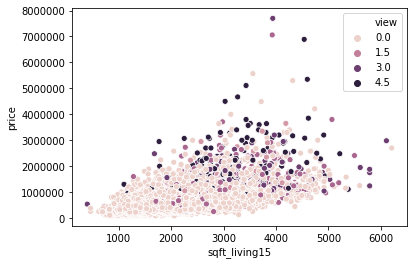

In [56]:
sns.scatterplot(x='sqft_living15', y='price', hue='view', data=df_model)
plt.show()

In [61]:
df_views = df_model.loc[df_model['view']!=0.0]
df_views.head()

,price,is_cust_build,view,waterfront,sqft_living15,has_basement,years_since_renovated
15,650000.0,0,3.0,0.0,2140,1,0.0
21,2000000.0,0,4.0,0.0,4110,1,0.0
49,1350000.0,0,2.0,1.0,2680,1,0.0
58,951000.0,0,4.0,0.0,2960,0,0.0
60,650000.0,0,3.0,0.0,2570,1,0.0


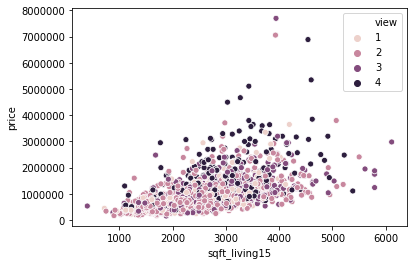

In [59]:
sns.scatterplot(x='sqft_living15', y='price', hue='view', data=df_views)
plt.show()

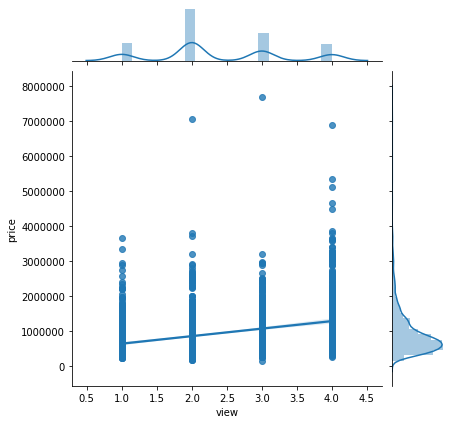

In [137]:
sns.jointplot('view','price', data=df_views, kind='reg');

### Renovations

In [98]:
df_renovated =  df_model.loc[df_model['years_since_renovated']<20]
df_renovated['grade'] = df_high_corr_and_location['grade']
df_renovated.head()

C:\Users\kekay\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,price,is_cust_build,view,waterfront,sqft_living15,has_basement,years_since_renovated,grade
0,221900.0,0,0.0,0.0,1340,0,0.0,7
2,180000.0,0,0.0,0.0,2720,0,0.0,6
3,604000.0,0,0.0,0.0,1360,1,0.0,7
4,510000.0,0,0.0,0.0,1800,0,0.0,8
5,1230000.0,0,0.0,0.0,4760,1,0.0,11


### Sqft_living 15

In [135]:
df_sqft_15 = df_model.loc[df_model['sqft_living15']<3000]
df_sqft_15 = df_sqft_15.loc[df_sqft_15['price']<800000]
df_sqft_15.head()

,price,is_cust_build,view,waterfront,sqft_living15,has_basement,years_since_renovated
0,221900.0,0,0.0,0.0,1340,0,0.0
1,538000.0,0,0.0,0.0,1690,1,29.0
2,180000.0,0,0.0,0.0,2720,0,0.0
3,604000.0,0,0.0,0.0,1360,1,0.0
4,510000.0,0,0.0,0.0,1800,0,0.0


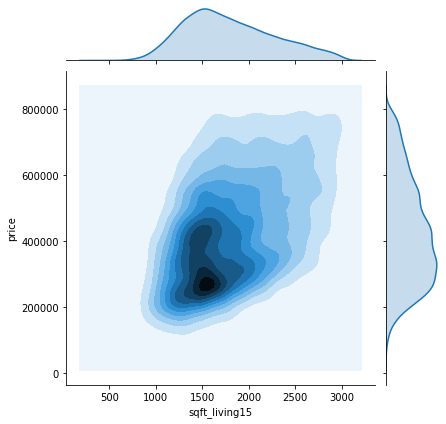

In [143]:
sns.jointplot(x='sqft_living15', y='price', kind='kde', data=df_sqft_15);
plt.show()

### Comments:
* After taking a look at the impact of only houses that have been viewed to get a better picture of the data, there seems to be a indicator that homes having higher view counts are generally larger, and more expensive. Is this because they are 'hot homes' or more because they are overpriced and people are passing these homes after viewing them?
* I'm going to assume that because some of these homes are not for sale, that views indicate highly sought after homes.
-----------------------
* House renovations don't seem to have a large impact on the data
-----------------------
* the square footage of nearby homes does seem to have an impact on price, with the highest concentration around the average upper-middle-class home